# Regression modeling

## 1. Linear Regression

In [1]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500
pd.options.display.width = 1000

In [2]:
DPP_DTT_df = pd.read_csv("combined3_df_DPP_DTT_step_revised_remove_others_plus_MGC_remove_delta_recover.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_dispersity,hole_mobility,post_process,film_deposition_type_spin,solvent_boiling_point,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent,delta_d,delta_p,delta_h
0,4.00,299.00,3.32,0.110000,1,1,132.0,0,0,0,0,9.29,2.10,0.98
1,4.00,299.00,3.32,0.290000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
2,4.00,299.00,3.32,0.230000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
3,4.00,299.00,3.32,0.730000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
4,4.00,299.00,3.32,1.860000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
5,4.00,299.00,3.32,0.210000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
6,4.00,299.00,3.32,0.340000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
7,4.00,299.00,3.32,0.240000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
8,4.00,299.00,3.32,1.970000,1,1,132.0,0,0,1,0,9.29,2.10,0.98
9,4.00,299.00,3.32,0.690000,1,1,132.0,0,0,1,0,9.29,2.10,0.98


In [3]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_dispersity',
 'hole_mobility',
 'post_process',
 'film_deposition_type_spin',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'substrate_pretreat_sam',
 'solution_treatment_poor_solvent',
 'delta_d',
 'delta_p',
 'delta_h']

In [45]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)
#DPPP_DTT_X = DPP_DTT_df.drop(labels = 'polymer_dispersity', axis = 1)

In [42]:
DPP_DTT_X_p = DPP_DTT_X.drop(['solvent_boiling_point', 'delta_d', 'delta_h'], axis=1)
DPP_DTT_X_p

,solution_concentration,polymer_mw,polymer_dispersity,post_process,film_deposition_type_spin,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent,delta_p
0,4.00,299.00,3.32,1,1,0,0,0,0,2.10
1,4.00,299.00,3.32,1,1,0,0,1,0,2.10
2,4.00,299.00,3.32,1,1,0,0,1,0,2.10
3,4.00,299.00,3.32,1,1,0,0,1,0,2.10
4,4.00,299.00,3.32,1,1,0,0,1,0,2.10
5,4.00,299.00,3.32,1,1,0,0,1,0,2.10
6,4.00,299.00,3.32,1,1,0,0,1,0,2.10
7,4.00,299.00,3.32,1,1,0,0,1,0,2.10
8,4.00,299.00,3.32,1,1,0,0,1,0,2.10
9,4.00,299.00,3.32,1,1,0,0,1,0,2.10


In [48]:
DPP_DTT_X_d = DPP_DTT_X.drop(['solvent_boiling_point', 'delta_p', 'delta_h'], axis=1)
DPP_DTT_X_d

,solution_concentration,polymer_mw,polymer_dispersity,post_process,film_deposition_type_spin,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent,delta_d
0,4.00,299.00,3.32,1,1,0,0,0,0,9.29
1,4.00,299.00,3.32,1,1,0,0,1,0,9.29
2,4.00,299.00,3.32,1,1,0,0,1,0,9.29
3,4.00,299.00,3.32,1,1,0,0,1,0,9.29
4,4.00,299.00,3.32,1,1,0,0,1,0,9.29
5,4.00,299.00,3.32,1,1,0,0,1,0,9.29
6,4.00,299.00,3.32,1,1,0,0,1,0,9.29
7,4.00,299.00,3.32,1,1,0,0,1,0,9.29
8,4.00,299.00,3.32,1,1,0,0,1,0,9.29
9,4.00,299.00,3.32,1,1,0,0,1,0,9.29


In [12]:
DPP_DTT_X_h = DPP_DTT_X.drop(['solvent_boiling_point', 'delta_d', 'delta_p'], axis=1)
DPP_DTT_X_h

,solution_concentration,polymer_mw,polymer_dispersity,post_process,film_deposition_type_spin,blend_conjugated_polymer,insulating_polymer,substrate_pretreat_sam,solution_treatment_poor_solvent,delta_h
0,4.00,299.00,3.32,1,1,0,0,0,0,0.98
1,4.00,299.00,3.32,1,1,0,0,1,0,0.98
2,4.00,299.00,3.32,1,1,0,0,1,0,0.98
3,4.00,299.00,3.32,1,1,0,0,1,0,0.98
4,4.00,299.00,3.32,1,1,0,0,1,0,0.98
5,4.00,299.00,3.32,1,1,0,0,1,0,0.98
6,4.00,299.00,3.32,1,1,0,0,1,0,0.98
7,4.00,299.00,3.32,1,1,0,0,1,0,0.98
8,4.00,299.00,3.32,1,1,0,0,1,0,0.98
9,4.00,299.00,3.32,1,1,0,0,1,0,0.98


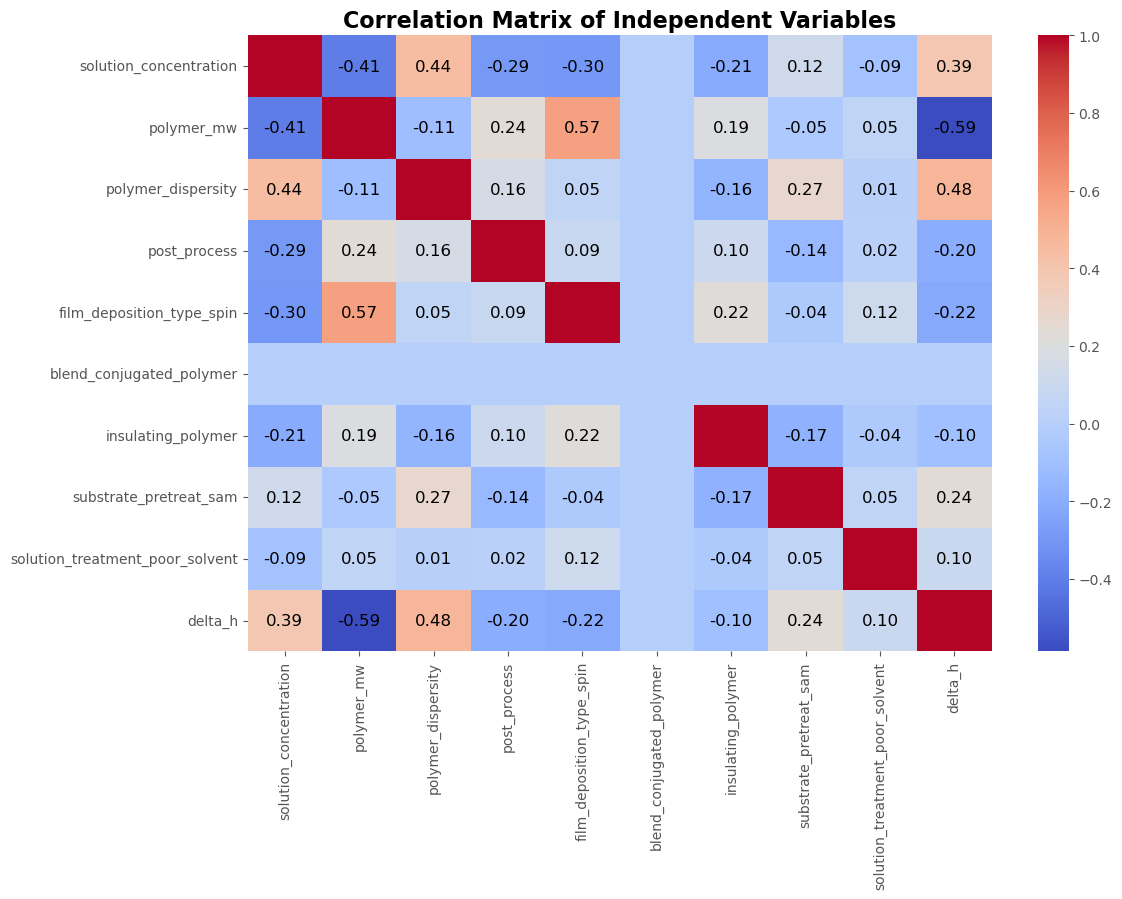

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the correlation matrix
correlation_matrix = DPP_DTT_X_h.corr()

# Check for NaN values and fill them with zeros
if correlation_matrix.isna().sum().sum() > 0:
    correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, 
                      annot=False, 
                      fmt=".2f", 
                      cmap="coolwarm", 
                      cbar=True)

# Annotate only the non-zero and non-NaN correlations
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        # Only annotate non-diagonal, non-zero, non-NaN values
        if i != j and not np.isnan(corr_value) and corr_value != 0:
            heatmap.text(j + 0.5, i + 0.5, 
                         f"{corr_value:.2f}", 
                         ha='center', 
                         va='center', 
                         color='black', 
                         fontsize=12, 
                         )

plt.title("Correlation Matrix of Independent Variables", fontsize=16, fontweight='bold')
plt.show()


In [30]:
#DPP_DTT_X_p = DPP_DTT_X_p.values
#DPP_DTT_Y = DPP_DTT_Y.values

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(DPP_DTT_X_h, DPP_DTT_Y, test_size = 0.2, random_state=42)

scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [73]:

LR_model = LinearRegression()

LR_model.fit(X_train, y_train)

y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.509
R² score for test set: 0.194


## Polynomial regression

Degree 1: R² train = 0.509, R² test = 0.194
Degree 2: R² train = -2.330, R² test = -1922888244700559966208.000
Degree 3: R² train = 0.830, R² test = -1360904246673753.500
Degree 4: R² train = 0.830, R² test = -1873520852834.715
Degree 5: R² train = 0.830, R² test = -154565967.362
Degree 6: R² train = 0.830, R² test = -19122.780


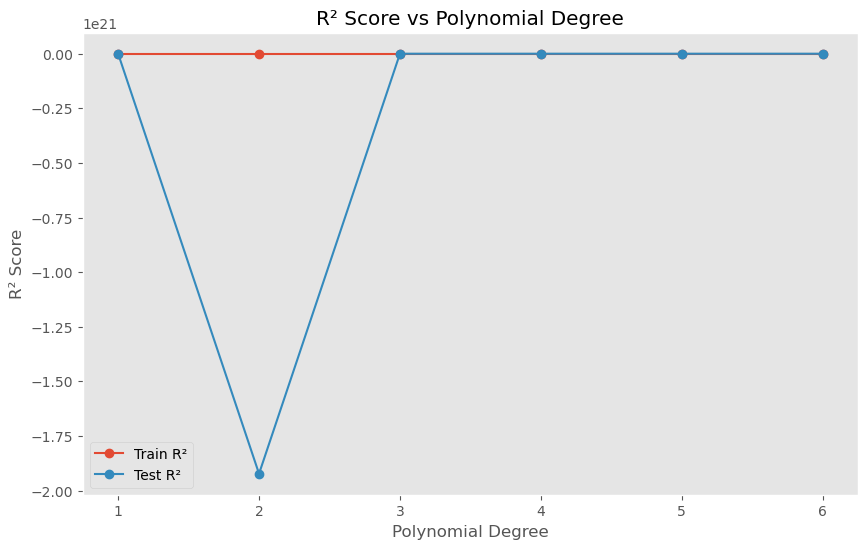

In [74]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
degrees = range(1, 7)

# Loop through degrees 1 to 6
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each degree
for degree, r2_train, r2_test in zip(degrees, train_r2_scores, test_r2_scores):
    print(f"Degree {degree}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.legend()
plt.grid()
plt.show()


## Ridge regression

Alpha 0.1: R² train = 0.509, R² test = 0.195
Alpha 0.2: R² train = 0.509, R² test = 0.195
Alpha 0.3: R² train = 0.509, R² test = 0.196
Alpha 0.4: R² train = 0.509, R² test = 0.197
Alpha 0.5: R² train = 0.509, R² test = 0.197
Alpha 0.6: R² train = 0.509, R² test = 0.198
Alpha 0.7: R² train = 0.509, R² test = 0.199
Alpha 0.8: R² train = 0.509, R² test = 0.199
Alpha 0.9: R² train = 0.509, R² test = 0.200
Alpha 1.0: R² train = 0.509, R² test = 0.200


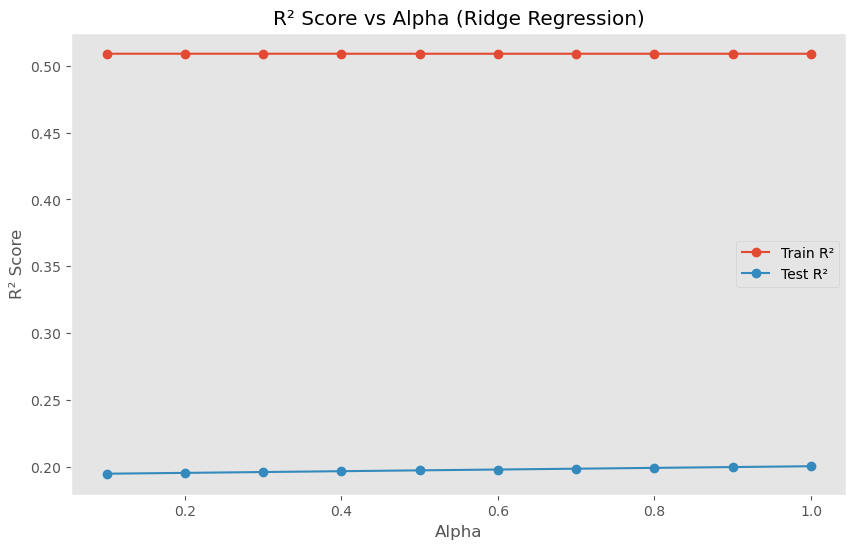

In [75]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Ridge Regression model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Ridge Regression)')
plt.legend()
plt.grid()
plt.show()


## Lasso regression

Alpha 0.1: R² train = 0.483, R² test = 0.210
Alpha 0.2: R² train = 0.439, R² test = 0.237
Alpha 0.3: R² train = 0.395, R² test = 0.227
Alpha 0.4: R² train = 0.345, R² test = 0.208
Alpha 0.5: R² train = 0.304, R² test = 0.197
Alpha 0.6: R² train = 0.263, R² test = 0.176
Alpha 0.7: R² train = 0.216, R² test = 0.138
Alpha 0.8: R² train = 0.163, R² test = 0.088
Alpha 0.9: R² train = 0.114, R² test = 0.057
Alpha 1.0: R² train = 0.060, R² test = 0.014


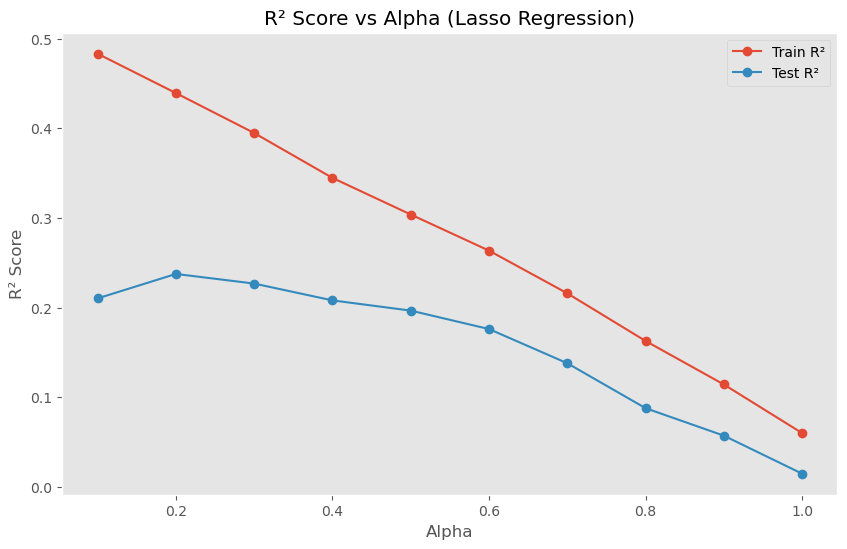

In [76]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store R² scores
train_r2_scores = []
test_r2_scores = []
alphas = np.arange(0.1, 1.1, 0.1)

# Loop through alpha values
for alpha in alphas:
    # Train Lasso Regression model
    model = Lasso(alpha=alpha, max_iter=10000)  # Increased max_iter to ensure convergence
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append scores to the lists
    train_r2_scores.append(r2_train)
    test_r2_scores.append(r2_test)

# Print R² scores for each alpha
for alpha, r2_train, r2_test in zip(alphas, train_r2_scores, test_r2_scores):
    print(f"Alpha {alpha:.1f}: R² train = {r2_train:.3f}, R² test = {r2_test:.3f}")

# Plot the R² scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2_scores, label='Train R²', marker='o')
plt.plot(alphas, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso Regression)')
plt.legend()
plt.grid()
plt.show()


## Elsaticnet regression

In [77]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Alpha and l1_ratio ranges
alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1.1, 0.1)

# Loop through alpha and l1_ratio values
for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Train ElasticNet Regression model
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the row with the maximum R² score for training
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
print("Maximum Train R²:")
print(max_train_r2)

# Find the row with the maximum R² score for testing
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]
print("\nMaximum Test R²:")
print(max_test_r2)

    alpha  l1_ratio  r2_train   r2_test
0     0.1       0.1  0.504647  0.251225
1     0.1       0.2  0.503237  0.245934
2     0.1       0.3  0.501399  0.239461
3     0.1       0.4  0.499071  0.231592
4     0.1       0.5  0.497005  0.224717
5     0.1       0.6  0.494584  0.216950
6     0.1       0.7  0.491725  0.207977
7     0.1       0.8  0.488954  0.205359
8     0.1       0.9  0.486277  0.207949
9     0.1       1.0  0.483291  0.210180
10    0.2       0.1  0.495043  0.289821
11    0.2       0.2  0.490368  0.281520
12    0.2       0.3  0.485251  0.272581
13    0.2       0.4  0.479034  0.261730
14    0.2       0.5  0.471718  0.250221
15    0.2       0.6  0.466408  0.251409
16    0.2       0.7  0.460239  0.251082
17    0.2       0.8  0.453118  0.249048
18    0.2       0.9  0.446033  0.244587
19    0.2       1.0  0.439367  0.237463
20    0.3       0.1  0.482820  0.315654
21    0.3       0.2  0.474369  0.305447
22    0.3       0.3  0.464402  0.292969
23    0.3       0.4  0.455063  0.278687


## Support Vector Regression (SVR)

In [78]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store results
results = []

# Range of C and epsilon values
C_values = np.arange(1, 7, 1)
epsilon_values = np.arange(0.1, 1.2, 0.1)

# Loop through C and epsilon values
for C in C_values:
    for epsilon in epsilon_values:
        # Train SVR model
        model = SVR(C=C, epsilon=epsilon)
        model.fit(X_train, y_train)  # Flatten y for SVR compatibility
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        # Append results
        results.append({'C': C, 'epsilon': epsilon, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Find the best combination for training and testing
max_train_r2 = results_df.loc[results_df['r2_train'].idxmax()]
max_test_r2 = results_df.loc[results_df['r2_test'].idxmax()]

print("\nMaximum Train R²:")
print(max_train_r2)

print("\nMaximum Test R²:")
print(max_test_r2)


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

    C  epsilon  r2_train   r2_test
0   1      0.1  0.677567  0.641279
1   1      0.2  0.685867  0.647943
2   1      0.3  0.696217  0.632726
3   1      0.4  0.700194  0.611728
4   1      0.5  0.695369  0.576984
5   1      0.6  0.691533  0.551333
6   1      0.7  0.682807  0.515210
7   1      0.8  0.667700  0.468128
8   1      0.9  0.644010  0.386130
9   1      1.0  0.609167  0.297894
10  1      1.1  0.569754  0.194407
11  2      0.1  0.799282  0.446912
12  2      0.2  0.799639  0.470082
13  2      0.3  0.800109  0.470755
14  2      0.4  0.793996  0.418225
15  2      0.5  0.783646  0.341665
16  2      0.6  0.770601  0.281709
17  2      0.7  0.755043  0.255041
18  2      0.8  0.741324  0.232791
19  2      0.9  0.724948  0.196244
20  2      1.0  0.703596  0.136404
21  2      1.1  0.672456  0.090138
22  3      0.1  0.805698  0.383464
23  3      0.2  0.808250  0.367402
24  3      0.3  0.808709  0.325679
25  3      0.4  0.803883  0.274852
26  3      0.5  0.797392  0.250217
27  3      0.6  0.78

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

## Decision tree regression

In [79]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R² scores
print(f"R² score for training set: {r2_train:.3f}")
print(f"R² score for test set: {r2_test:.3f}")

R² score for training set: 0.830
R² score for test set: 0.346


## Random forest regression

In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_estimators
n_estimators_range = range(100, 401, 10)

# Loop through n_estimators values
for n_estimators in n_estimators_range:
    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_estimators': n_estimators, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828434  0.358331
25           350  0.828393  0.358147
27           370  0.828448  0.356821
24           340  0.828326  0.355587
28           380  0.828372  0.354974
21           310  0.828448  0.354747
1            110  0.828693  0.353125
29           390  0.828299  0.352991
30           400  0.828317  0.352432
20           300  0.828479  0.352319


## Gradient bossting regression

In [81]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train Gradient Boosting Regressor
            model = GradientBoostingRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
            )
            model.fit(X_train, y_train)  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Print the top results sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

Top 10 configurations by Test R²:
    n_estimators  r2_train   r2_test
26           360  0.828434  0.358331
25           350  0.828393  0.358147
27           370  0.828448  0.356821
24           340  0.828326  0.355587
28           380  0.828372  0.354974
21           310  0.828448  0.354747
1            110  0.828693  0.353125
29           390  0.828299  0.352991
30           400  0.828317  0.352432
20           300  0.828479  0.352319


## K-nearest Neighbors Regression

In [82]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Range of n_neighbors
n_neighbors_range = range(1, 17)

# Loop through n_neighbors values
for n_neighbors in n_neighbors_range:
    # Train K-Nearest Neighbors Regressor
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)  # Flatten y for compatibility
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({'n_neighbors': n_neighbors, 'r2_train': r2_train, 'r2_test': r2_test})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print("Top configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top configurations by Test R²:
    n_neighbors  r2_train   r2_test
3             4  0.797518  0.550191
0             1  0.785036  0.543855
15           16  0.502404  0.419917
4             5  0.791529  0.408729
14           15  0.528317  0.402670
13           14  0.544276  0.374000
12           13  0.571958  0.344171
11           12  0.602801  0.322796
9            10  0.664255  0.304625
8             9  0.710170  0.291206


In [83]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Train XGBoost Regressor
            model = XGBRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth,
                random_state=42
            )
            model.fit(X_train, y_train)  # Flatten y for compatibility
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²
print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
34             100            0.3          3  0.829805  0.348480
1602           200            0.1          3  0.829676  0.348445
2402           250            0.1          3  0.829734  0.348378
3362           310            0.1          3  0.829784  0.348361
1762           210            0.1          3  0.829689  0.348360
3202           300            0.1          3  0.829781  0.348342
962            160            0.1          3  0.829537  0.348316
2082           230            0.1          3  0.829719  0.348305
194            110            0.3          3  0.829814  0.348302
1122           170            0.1          3  0.829583  0.348292


## Adaboost regression

In [84]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize lists to store results
results = []

# Hyperparameter ranges
n_estimators_range = range(100, 311, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
max_depth_range = range(1, 17)

# Perform grid search over hyperparameters
for n_estimators in n_estimators_range:
    for learning_rate in learning_rate_range:
        for max_depth in max_depth_range:
            # Define the AdaBoost model with a DecisionTreeRegressor as the base learner
            model = AdaBoostRegressor(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42
            )
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Predict on training and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            
            # Calculate R² scores
            r2_train = r2_score(y_train, y_train_pred)
            r2_test = r2_score(y_test, y_test_pred)
            
            # Append results
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'r2_train': r2_train,
                'r2_test': r2_test
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the top 10 configurations sorted by test R²

print("Top 10 configurations by Test R²:")
print(results_df.sort_values(by='r2_test', ascending=False).head(10))


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Top 10 configurations by Test R²:
      n_estimators  learning_rate  max_depth  r2_train   r2_test
412            120            0.6         13  0.756008  0.810147
2802           270            0.6          3  0.756008  0.810147
410            120            0.6         11  0.756008  0.810147
409            120            0.6         10  0.756008  0.810147
408            120            0.6          9  0.756008  0.810147
407            120            0.6          8  0.756008  0.810147
406            120            0.6          7  0.756008  0.810147
405            120            0.6          6  0.756008  0.810147
404            120            0.6          5  0.756008  0.810147
403            120            0.6          4  0.756008  0.810147


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example dataset (replace with your actual dataset)

# Train AdaBoost Regressor
model = AdaBoostRegressor(
    n_estimators=120,
    learning_rate=0.6,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X_h.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

Feature Importance (Descending Order):
                           Feature  Importance
1                       polymer_mw    0.615645
6               insulating_polymer    0.146519
4        film_deposition_type_spin    0.102992
2               polymer_dispersity    0.097901
7           substrate_pretreat_sam    0.032801
0           solution_concentration    0.002301
9                          delta_d    0.001842
3                     post_process    0.000000
5         blend_conjugated_polymer    0.000000
8  solution_treatment_poor_solvent    0.000000


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
# Import necessary libraries
from sklearn.inspection import permutation_importance

# Initialize and train the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': DPP_DTT_X_d.columns,
    'Importance': perm_importance.importances_mean
})

# Sort the features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(importance_df)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importance (Descending Order):
                           Feature  Importance
6               insulating_polymer    0.464504
4        film_deposition_type_spin    0.338995
1                       polymer_mw    0.150660
2               polymer_dispersity    0.148611
9                          delta_d    0.097803
7           substrate_pretreat_sam    0.080989
0           solution_concentration    0.012998
3                     post_process    0.000000
5         blend_conjugated_polymer    0.000000
8  solution_treatment_poor_solvent    0.000000


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

print("Correlation Matrix:")
correlation_matrix = DPP_DTT_X.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Independent Variables")
plt.show()
plt.savefig(fname='DPP_DTT_revised_matrix.tif', format='tiff', dpi=300)

vif_data = pd.DataFrame()
vif_data['Feature'] = DPP_DTT_X.columns
vif_data['VIF'] = [
    variance_inflation_factor(DPP_DTT_X, i + 1) for i in range(DPP_DTT_X.shape[1])
]

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Range of K-Fold splits to evaluate
k_values = range(2, 11)  # From K=2 to K=10 (K=1 is invalid for cross-validation)

# Lists to store results for each K
results = []

# Iterate over different K values
for k in k_values:
    # Initialize K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize lists to store R² scores for this K
    train_r2_scores = []
    test_r2_scores = []
    
    # Define the AdaBoost Regressor
    model = AdaBoostRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Perform cross-validation
    for train_index, test_index in kf.split(DPP_DTT_X):
        # Split data into training and test sets
        X_train, X_test = DPP_DTT_X.iloc[train_index], DPP_DTT_X.iloc[test_index]
        y_train, y_test = DPP_DTT_Y.iloc[train_index], DPP_DTT_Y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append scores
        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
    
    # Store average R² scores for this K
    results.append({
        'K': k,
        'Avg Train R²': np.mean(train_r2_scores),
        'Avg Test R²': np.mean(test_r2_scores)
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the results
print("K-Fold Cross-Validation Results:")
print(results_df)


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.ensemble import AdaBoostRegressor

# Define the objective function for Bayesian Optimization
def objective_function(**params):
    # Convert parameters to float (BayesianOptimization passes them as numpy.float64)
    params = {k: float(v) for k, v in params.items()}
    
    # Instantiate AdaBoost Regressor with given parameters
    model = AdaBoostRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate']
    )

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Return the R^2 score as the objective
    return r2_score(y_test, y_pred)

# Define the parameter space for Bayesian Optimization
pbounds = {
    'n_estimators': (10, 200),  # Number of estimators
    'learning_rate': (0.01, 1.0)  # Learning rate
}

# Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=5,  # Number of initial random points
    n_iter=20  # Number of iterations
)

# Output the best parameters and the corresponding R^2 score
print("Best parameters:", optimizer.max['params'])
print("Best R^2 score:", optimizer.max['target'])